# Convolutional Neural Network - CIFAR10 raw data using Keras

This notebook will guide you through the use of the `keras` package to train different types of CNN for image recognition. You are going to use the `CIFAR10` dataset.


## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#we import various classes from keras to simplify usage below (no need to preceed declaration by namespace 'tensorflow.keras...'
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, Activation, BatchNormalization, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

from sklearn import metrics as me

%matplotlib inline

## Loading the raw data
First load the `cifar10` dataset and normalize all values to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('original data type : ', X_train.dtype)
print('original data range [', np.min(X_train), ',', np.max(X_train),']')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print('\nconverted data type : ', X_train.dtype)
print('converted data range [', np.min(X_train), ',', np.max(X_train),']')

print('\ntraining data shape : ', X_train.shape)
print('testing data shape  : ', X_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
original data type :  uint8
original data range [ 0 , 255 ]

converted data type :  float32
converted data range [ 0.0 , 1.0 ]

training data shape :  (50000, 32, 32, 3)
testing data shape  :  (10000, 32, 32, 3)


Define a function to plot some images from CIFAR; rows correspond to same class

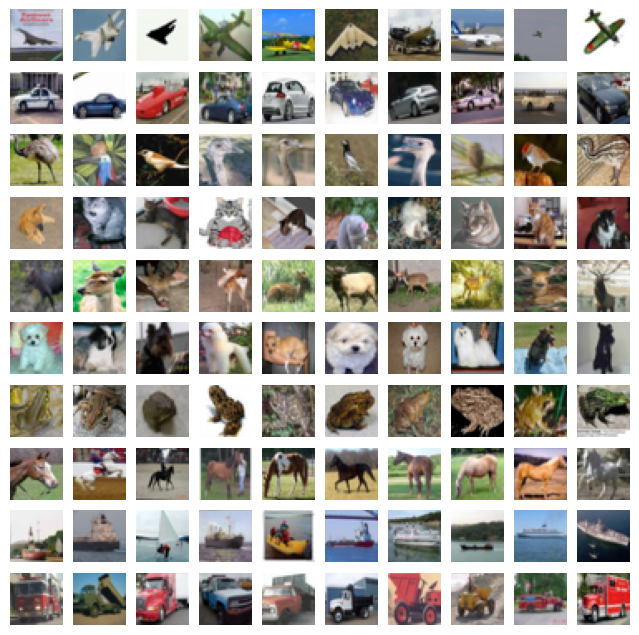

In [3]:
def show_imgs(X,y):
    plt.figure(1, figsize=(8,8))
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            while y[k] != i: k += 1
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k])
            plt.axis('off')
            k += 1
    plt.show()


show_imgs(X_test, y_test)


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in :

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`

Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [4]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a CNN. We will train through E epochs, using batches of size B. We can try with 30 epochs and batches of 128 images.

In [5]:
E = 10                # number of epochs
B = 128                # batch size
V = 0.2               # validation split

### START YOUR CODE ###

# define the input shape of the images
height = 32
width = 32
channels = 3

X_val = X_train[:int(V*len(X_train))]
Y_val = Y_train[:int(V*len(Y_train))]

X_train = X_train[int(V*len(X_train)):]
Y_train = Y_train[int(V*len(Y_train)):]

cnn1 = Sequential([
    Conv2D(16, (3, 3), input_shape=(height, width, channels), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# cnn2 architecture
cnn2 = Sequential([
    Conv2D(16, (3, 3), input_shape=(height, width, channels), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(300, activation='relu'),
    Dropout(0.3),
    Dense(n_classes, activation='softmax')
])

# cnn3 architecture
cnn3 = Sequential([
    Conv2D(32, (3, 3), input_shape=(height, width, channels), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(300, activation='relu'),
    Dropout(0.3),
    Dense(n_classes, activation='softmax')
])

# cnn4 architecture
cnn4 = Sequential([
    Conv2D(32, (3, 3), input_shape=(height, width, channels), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(300, activation='relu'),
    Dropout(0.3),
    Dense(n_classes, activation='softmax')
])

### END YOUR CODE ###,

cnn1.summary()
cnn2.summary()
cnn3.summary()
cnn4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 200)               2

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [6]:
cnn1.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
log_cnn1 = cnn1.fit(X_train, Y_train, batch_size=B, epochs=E,
               verbose=1, validation_data=(X_val, Y_val))

cnn2.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
log_cnn2 = cnn2.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_val, Y_val))

cnn3.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
log_cnn3 = cnn3.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_val, Y_val))

cnn4.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
log_cnn4 = cnn4.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_val, Y_val))

Epoch 1/10
313/313 [==============================] - 7s 7ms/step - loss: 1.6569 - accuracy: 0.4064 - val_loss: 1.4449 - val_accuracy: 0.4895
Epoch 2/10
313/313 [==============================] - 1s 5ms/step - loss: 1.3501 - accuracy: 0.5227 - val_loss: 1.2747 - val_accuracy: 0.5473
Epoch 3/10
313/313 [==============================] - 1s 5ms/step - loss: 1.2206 - accuracy: 0.5719 - val_loss: 1.1906 - val_accuracy: 0.5807
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 1.1360 - accuracy: 0.6018 - val_loss: 1.1730 - val_accuracy: 0.5858
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 1.0564 - accuracy: 0.6316 - val_loss: 1.0719 - val_accuracy: 0.6234
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 0.9949 - accuracy: 0.6511 - val_loss: 1.0195 - val_accuracy: 0.6471
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.9433 - accuracy: 0.6720 - val_loss: 0.9966 - val_accuracy: 0.6549
Epoch 

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

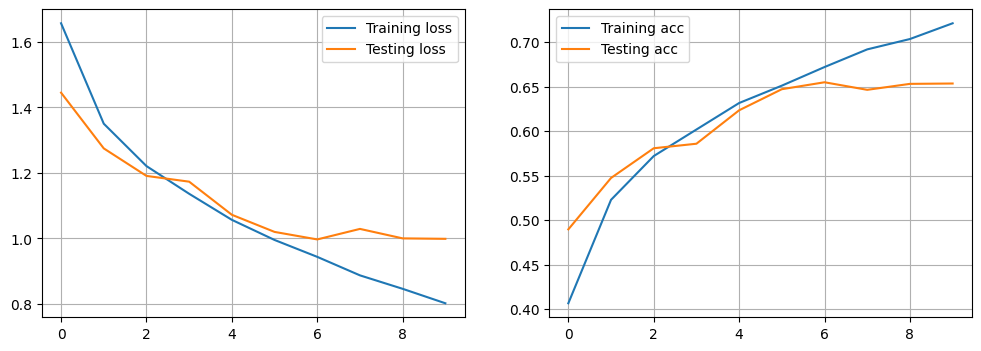

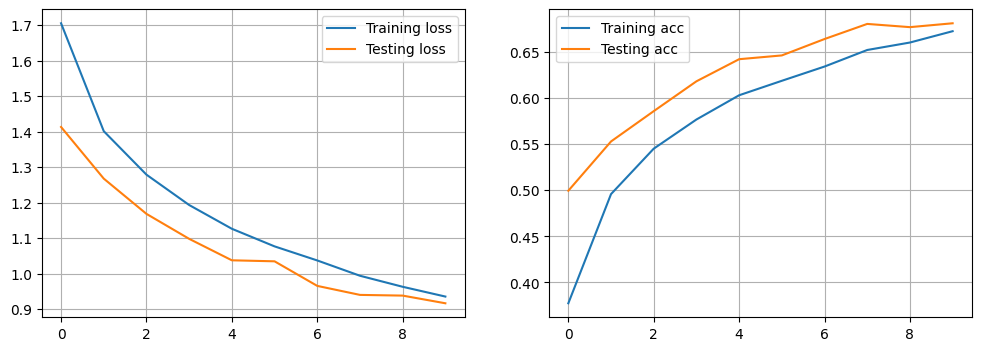

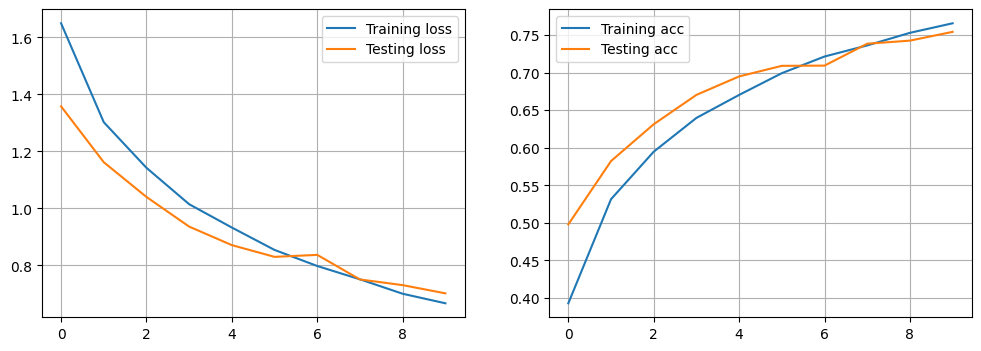

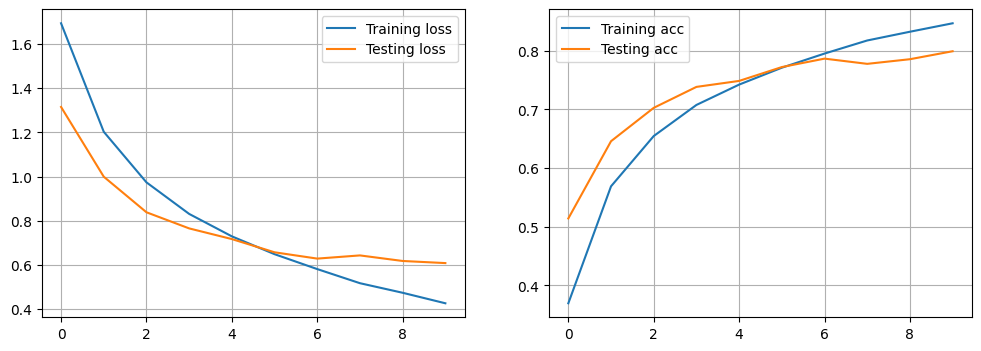

In [8]:
# cnn1
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_cnn1.history['loss'], label='Training loss')
ax1.plot(log_cnn1.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log_cnn1.history['accuracy'], label='Training acc')
ax2.plot(log_cnn1.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

# cnn2
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_cnn2.history['loss'], label='Training loss')
ax1.plot(log_cnn2.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log_cnn2.history['accuracy'], label='Training acc')
ax2.plot(log_cnn2.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

# cnn3
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_cnn3.history['loss'], label='Training loss')
ax1.plot(log_cnn3.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log_cnn3.history['accuracy'], label='Training acc')
ax2.plot(log_cnn3.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

# cnn4
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_cnn4.history['loss'], label='Training loss')
ax1.plot(log_cnn4.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log_cnn4.history['accuracy'], label='Training acc')
ax2.plot(log_cnn4.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [11]:
loss_test, metric_test = cnn1.evaluate(X_test, Y_test, verbose=0)
print('cnn1 test loss:', loss_test)
print('cnn1 test accuracy:', metric_test)

loss_test_cnn2, metric_test_cnn2 = cnn2.evaluate(X_test, Y_test, verbose=0)
print('cnn2 test loss:', loss_test_cnn2)
print('cnn2 test accuracy:', metric_test_cnn2)

loss_test_cnn3, metric_test_cnn3 = cnn3.evaluate(X_test, Y_test, verbose=0)
print('cnn3 test loss:', loss_test_cnn3)
print('cnn3 test accuracy:', metric_test_cnn3)

loss_test_cnn4, metric_test_cnn4 = cnn4.evaluate(X_test, Y_test, verbose=0)
print('cnn4 test loss:', loss_test_cnn4)
print('cnn4 test accuracy:', metric_test_cnn4)

cnn1 test loss: 1.0257269144058228
cnn1 test accuracy: 0.6517000198364258
cnn2 test loss: 0.9302875995635986
cnn2 test accuracy: 0.6773999929428101
cnn3 test loss: 0.7144749760627747
cnn3 test accuracy: 0.7555000185966492
cnn4 test loss: 0.6393827199935913
cnn4 test accuracy: 0.7875000238418579


### Confusion matrix
We can use the `predict()` function to get the predicted classes via `argmax`. The output is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [14]:
pred_cnn1 = np.argmax(cnn1.predict(X_test, verbose=0), axis=1)
cm_cnn1 = me.confusion_matrix(y_test, pred_cnn1)
print("Confusion matrix for cnn1:")
print(cm_cnn1)

pred_cnn2 = np.argmax(cnn2.predict(X_test, verbose=0), axis=1)
cm_cnn2 = me.confusion_matrix(y_test, pred_cnn2)
print("Confusion matrix for cnn2:")
print(cm_cnn2)

pred_cnn3 = np.argmax(cnn3.predict(X_test, verbose=0), axis=1)
cm_cnn3 = me.confusion_matrix(y_test, pred_cnn3)
print("Confusion matrix for cnn3:")
print(cm_cnn3)

pred_cnn4 = np.argmax(cnn4.predict(X_test, verbose=0), axis=1)
cm_cnn4 = me.confusion_matrix(y_test, pred_cnn4)
print("Confusion matrix for cnn4:")
print(cm_cnn4)

Confusion matrix for cnn1:
[[632  40  53  10  13   4   3  11 201  33]
 [ 10 807   6   3   4   9   4   4  56  97]
 [ 65  17 583  58  69  89  23  38  36  22]
 [ 22  28  74 418  63 232  39  47  48  29]
 [ 21  13 124  59 550  58  27 102  39   7]
 [ 11  12  79 142  33 606   9  68  28  12]
 [  5  27  79  68  78  60 623  16  29  15]
 [ 14  16  36  25  43  77   2 738  17  32]
 [ 27  44   9   8   7   7   0   8 871  19]
 [ 27 128   8  13   3  12   4  21  95 689]]
Confusion matrix for cnn2:
[[656  20  77  21  36  17  17  15 102  39]
 [ 19 754   8  15   7  15  24   8  36 114]
 [ 44   7 523  39 135 126  71  38  12   5]
 [ 10   8  83 382  87 283  80  46  10  11]
 [ 11   1  68  22 668  72  73  69  15   1]
 [  7   1  64  70  60 718  31  40   4   5]
 [  4   2  46  30  55  33 818   8   2   2]
 [ 10   1  27  23  72 118   9 726   4  10]
 [ 50  40  16  17  16  15   9   7 804  26]
 [ 25  83  13  19  16  19  22  37  41 725]]
Confusion matrix for cnn3:
[[793  31  42  10  12   5   4  13  53  37]
 [  8 897   3 

### Table of results

- epochs: 10
- batchsize: 128


| CNN | Architecture                                                                                                                                                                                  | Acc. validation % | Acc. test % |
|-----|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------|-------------|
| 1   | `Conv2D(16, (3, 3))` ; `MaxPooling2D((2, 2))` ; `Conv2D(32, (3, 3))` ; `MaxPooling2D((2, 2))` ; `Flatten()` ; `Dense(200)` ; `Dense(n_classes, 'softmax')`                                  | 0.6535               | 0.6517000198364258      |
| 2   | `Conv2D(16, (3, 3))` ; `MaxPooling2D((2, 2))` ; `Conv2D(32, (3, 3))` ; `MaxPooling2D((2, 2))` ; `Flatten()` ; `Dropout(0.3)` ; `Dense(300)` ; `Dropout(0.3)` ; `Dense(n_classes, 'softmax')` | 0.6813               | 0.6773999929428101         |
| 3   | `Conv2D(32, (3, 3))` x 2 ; `MaxPooling2D((2, 2))` ; `Conv2D(64, (3, 3))` x 2 ; `MaxPooling2D((2, 2))` ; `Flatten()` ; `Dropout(0.3)` ; `Dense(300)` ; `Dropout(0.3)` ; `Dense(n_classes, 'softmax')` | 0.7545               | 0.7555000185966492        |
| 4   | `Conv2D(32, (3, 3), padding='same')` x 2 ; `MaxPooling2D((2, 2))` ; `Conv2D(64, (3, 3), padding='same')` x 2 ; `MaxPooling2D((2, 2))` ; `Conv2D(128, (3, 3), padding='same')` x 2 ; `MaxPooling2D((2, 2))` ; `Flatten()` ; `Dropout(0.3)` ; `Dense(300)` ; `Dropout(0.3)` ; `Dense(n_classes, 'softmax')` | 0.7993               | 0.7875000238418579         |

